In [271]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [272]:
df = pd.read_csv('train.csv')

In [273]:
df.head()


,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [274]:
df.shape

(13730, 167)

In [275]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 167 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   NU_INSCRICAO                 object 
 2   NU_ANO                       int64  
 3   CO_MUNICIPIO_RESIDENCIA      int64  
 4   NO_MUNICIPIO_RESIDENCIA      object 
 5   CO_UF_RESIDENCIA             int64  
 6   SG_UF_RESIDENCIA             object 
 7   NU_IDADE                     int64  
 8   TP_SEXO                      object 
 9   TP_ESTADO_CIVIL              float64
 10  TP_COR_RACA                  int64  
 11  TP_NACIONALIDADE             int64  
 12  CO_MUNICIPIO_NASCIMENTO      float64
 13  NO_MUNICIPIO_NASCIMENTO      object 
 14  CO_UF_NASCIMENTO             float64
 15  SG_UF_NASCIMENTO             object 
 16  TP_ST_CONCLUSAO              int64  
 17  TP_ANO_CONCLUIU              int64  
 18  TP_ESCOLA                    int64  
 19  TP_

In [352]:
df_notas_X = df[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

In [353]:
df_notas_Y = df[['NU_NOTA_MT']]

In [354]:
df_notas_X.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [355]:
df_notas_X

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,436.3,495.4,581.2,520.0
1,474.5,544.1,599.0,580.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
13725,438.2,419.7,394.5,440.0
13726,423.8,557.9,533.0,560.0
13727,460.5,528.9,569.3,600.0
13728,422.5,621.7,569.0,460.0


In [356]:
df_notas_Y.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [357]:
df_notas_Y

,NU_NOTA_MT
0,399.4
1,459.8
2,0.0
3,0.0
4,0.0
...,...
13725,403.2
13726,452.4
13727,398.0
13728,386.6


In [358]:
#Criar ambiente de treino
X_train, X_test, Y_train, Y_test = train_test_split(df_notas_X,df_notas_Y,test_size=0.33,random_state=5)

In [359]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((9199, 4), (9199, 1), (4531, 4), (4531, 1))

In [360]:
lm = LinearRegression()

In [361]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
lm.intercept_

array([-2.78515104])

In [363]:
lm.coef_

array([[ 0.34826213, -0.11449997,  0.65279276,  0.08076938]])

In [364]:
lm.score(X_train,Y_train)

0.9005962959126597

In [365]:
lm.fit(X_test,Y_test)
lm.score(X_test,Y_test)

0.9068158399724845

In [366]:
print(np.mean((Y_train-lm.predict(X_train))**2))

NU_NOTA_MT    5192.490761
dtype: float64


In [367]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [368]:
pred_train

array([[506.12148194],
       [ -2.86408195],
       [ -2.86408195],
       ...,
       [ -2.86408195],
       [428.22651608],
       [516.84273303]])

In [369]:
pred_test

array([[ -2.86408195],
       [475.97608203],
       [552.02004704],
       ...,
       [399.60263063],
       [410.1140177 ],
       [497.93078849]])

In [370]:
print(np.mean((Y_train-lm.predict(X_train))**2))

NU_NOTA_MT    5192.490761
dtype: float64


In [371]:
print(np.mean((Y_test-lm.predict(X_test))**2))

NU_NOTA_MT    4913.458062
dtype: float64


Text(0, 0.5, 'Residuals')

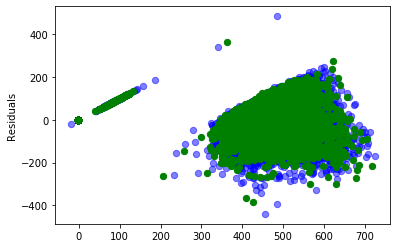

In [372]:
plt.scatter(lm.predict(X_train),lm.predict(X_train) - Y_train,c="b",s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test) - Y_test,c="g",s=40)
plt.hlines(y=0,xmin=0, xmax=0)
plt.ylabel('Residuals')

In [373]:
df_test = pd.read_csv('test.csv')

In [374]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

In [375]:
df_col_test = df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

In [376]:
df_col_test.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [377]:
df_col_test

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,320.0
...,...,...,...,...
4571,398.3,558.2,511.6,500.0
4572,427.6,579.7,471.1,520.0
4573,639.2,643.8,604.9,640.0
4574,427.1,467.9,540.2,520.0


In [378]:
pred_new_test = lm.predict(df_col_test)

In [379]:
lm.coef_

array([[ 0.35841937, -0.15208211,  0.68303042,  0.0807067 ]])

In [380]:
pred_new_test

array([[425.11017512],
       [483.73676644],
       [560.95010026],
       ...,
       [593.14450647],
       [489.99812937],
       [ -2.86408195]])

In [381]:
df_test['TESTE'] = pred_new_test

In [383]:
df_test['NU_NOTA_MT'] = pred_new_test

In [384]:
df_test

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TESTE,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,B,A,C,A,A,C,C,A,425.110175,425.110175
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,E,B,C,B,B,B,F,A,483.736766,483.736766
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,E,E,D,B,B,A,NaN,A,560.950100,560.950100
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,H,E,G,B,B,A,NaN,A,-2.864082,-2.864082
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,D,H,H,C,B,A,NaN,A,550.836841,550.836841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,...,E,E,D,A,B,A,NaN,A,444.793832,444.793832
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,...,C,C,C,A,A,A,NaN,A,425.977156,425.977156
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,...,D,F,D,B,B,A,NaN,D,593.144506,593.144506
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,...,C,E,C,A,A,A,NaN,A,489.998129,489.998129


In [385]:
df_output = df_test[['NU_INSCRICAO','NU_NOTA_MT']]

In [386]:
df_output

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,425.110175
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,483.736766
2,b38a03232f43b11c9d0788abaf060f7366053b6d,560.950100
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-2.864082
4,715494628a50142ce8cb17191cfe6d0f3cae0934,550.836841
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,444.793832
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,425.977156
4573,655fa6306720ff16e825903b5422a46608a77545,593.144506
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,489.998129


In [388]:
df_output.to_csv('answer.csv',sep=',',index=False)